### Задача 1: Сгенерировать наборы данных, построить KNN, построить графики точности для k in (1,9)

In [1]:
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sortedcontainers import SortedList
from future.utils import iteritems

Используем класс из прошлого урока

In [2]:
class KNN(object):
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        y = np.zeros(len(X))
        
        # для каждого X[i]
            # вычислить расстояния от X[i] до self.X[j]
        
        for i, x in enumerate(X):
            sl = SortedList()
            for j, x_train in enumerate(self.X):
                diff = x - x_train
                d = diff.dot(diff)
                if ( len(sl) < self.k):
                    sl.add( (d, self.y[j]) )
                else:
                    if(d < sl[-1][0]):
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
                        
            votes = {}
            
            for _, v in sl:
                votes[v] = votes.get(v, 0) + 1
            
            max_count = -1
            max_vote = 0
            for v, count in iteritems(votes):
                if (count > max_count):
                    max_count = count
                    max_vote = v
            y[i] = v
        return y
        
    def score(self, X_test, y_test):
        y_predicted = self.predict(X_test)
        return np.mean(y_predicted == y_test)


#### Луны

Строим набор в виде "лун"

In [3]:
X_moons, y_moons = make_moons(n_samples=100)

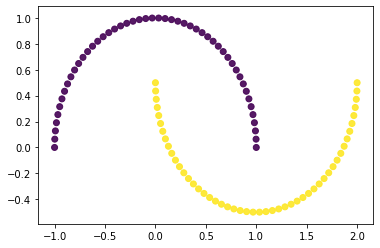

In [4]:
plt.scatter(X_moons[:,0], X_moons[:,1],  c=y_moons, alpha=0.9)

Находим точность KNN при разных значениях k

In [5]:
moons_score = []
for i in range(1,9):
    moons = KNN(i)
    X_train, y_train = X_moons[:50], y_moons[:50]
    X_test, y_test = X_moons[50:], y_moons[50:]
    moons.fit(X_train, y_train)
    moons_score.append(moons.score(X_test, y_test))

Строим график точности

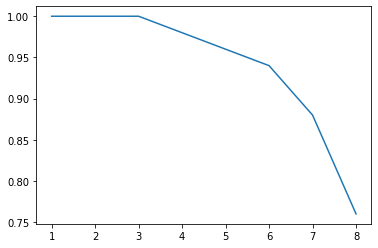

In [6]:
plt.plot(range(1,9), moons_score)

#### Круги

In [13]:
X_circles, y_circles = make_circles(n_samples=200, noise = 0.05)

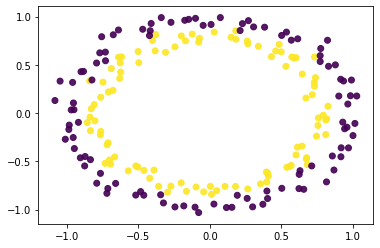

In [14]:
plt.scatter(X_circles[:,0], X_circles[:,1],  c=y_circles, alpha=0.9)

In [16]:
circles_score = []
for i in range(1,9):
    circles = KNN(i)
    X_train, y_train = X_circles[:50], y_circles[:50]
    X_test, y_test = X_circles[50:], y_circles[50:]
    circles.fit(X_train, y_train)
    circles_score.append(circles.score(X_test, y_test))

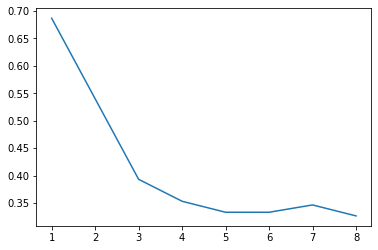

In [18]:
plt.plot(range(1,9), circles_score)

### Задча 2: Метрики

In [19]:
C="Cat"
F="Fish"
H="Hen"

# истинные значения
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]

# результат системы
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

считаем матрицу ошибок "влоб"

In [20]:
confusion = np.zeros((3, 3))
for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
        if y_true[i] == C:
            confusion[0, 0] += 1
        elif y_true[i] == F:
            confusion[1, 1] += 1
        elif y_true[i] == H:
            confusion[2, 2] += 1
    elif y_true[i] == C and y_pred[i] == F:
        confusion[0, 1] += 1
    elif y_true[i] == C and y_pred[i] == H:
        confusion[0, 2] += 1
    elif y_true[i] == F and y_pred[i] == C:
        confusion[1, 0] += 1
    elif y_true[i] == F and y_pred[i] == H:
        confusion[1, 2] += 1
    elif y_true[i] == H and y_pred[i] == C:
        confusion[2, 0] += 1
    elif y_true[i] == H and y_pred[i] == F:
        confusion[2, 1] += 1

In [21]:
confusion

array([[4., 1., 1.],
       [6., 2., 2.],
       [3., 0., 6.]])

Считаем общее количество всех предсказаний по каждой категории

In [24]:
predicted_count = confusion.sum(axis=0)
predicted_count

Теперь считаем значение precision просто поделив количество верных предсказаний на общее количество предсказаний по этой категории

In [28]:
precision_cat = confusion[0,0] / predicted_count[0]
precision_cat

0.3076923076923077

In [29]:
precision_fish = confusion[1,1] / predicted_count[1]
precision_fish

0.6666666666666666

In [40]:
precision_hen = confusion[2,2] / predicted_count[2]
precision_hen

0.6666666666666666

Аналогично считаем recall, только вместо общего числа предсказаний берём реальное число элементов по этой категории.

In [33]:
actual_count = confusion.sum(axis=1)
actual_count

array([ 6., 10.,  9.])

In [34]:
recall_cat = confusion[0,0] / actual_count[0]
recall_fish = confusion[1,1] / actual_count[1]
recall_hen = confusion[2,2] / actual_count[2]
(recall_cat, recall_fish, recall_hen)

(0.6666666666666666, 0.2, 0.6666666666666666)

Считаем f1-score как среднее гармоническое между precision и recall

In [36]:
f1_cat = 2 * precision_cat * recall_cat / (precision_cat + recall_cat)
f1_cat

0.42105263157894735

In [38]:
f1_fish = 2 * precision_fish * recall_fish / (precision_fish + recall_fish)
f1_fish

0.30769230769230765

In [41]:
f1_hen = 2 * precision_hen * recall_hen / (precision_hen + recall_hen)
f1_hen

0.6666666666666666

Находим macro_f1 как среднее арифметическое по всем f1 метрикам. Аналогично среднее находится и по всем остальным показателям

In [42]:
macro_f1 = (f1_cat + f1_fish + f1_hen) / 3
macro_f1

0.46513720197930725

Взвешенные показатели находятся как среднее, но с добавлением веса

In [43]:
weighted_f1 = (actual_count[0] * f1_cat + actual_count[1] * f1_fish + actual_count[2] * f1_hen) / actual_count.sum()
weighted_f1


0.46412955465587047